# Distribution contributions and punishment

Here we present a simple analysis of the contributions and punishments utilized by participants.

In [16]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from aimanager.utils.utils import make_dir
import scipy
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

folder = '../../data/experiments'
merge_file = 'pilot_random1'
plot_folder = 'plots/distribution'

df =pd.read_csv(os.path.join(folder, f'{merge_file}_player_round_slim.csv'))
print(len(df))

make_dir(plot_folder)

df[['contribution', 'punishment']] = df[['contribution', 'punishment']].astype(int)

5844


In [17]:
df['experiment_name'].value_counts() / 4 / 8 / 2

random_1          49.0000
trail_rounds_2    42.3125
Name: experiment_name, dtype: float64

In [26]:
dfg = df.groupby(['experiment_name'])['player_no_input'].value_counts(normalize=True)
dfg.name = 'fraction'
dfg = dfg.reset_index()
dfg

,experiment_name,player_no_input,fraction
0,random_1,0,0.986288
1,random_1,1,0.013712
2,trail_rounds_2,0,0.972304
3,trail_rounds_2,1,0.027696


In [27]:
dfg = df.groupby(['experiment_name'])['manager_no_input'].value_counts(normalize=True)
dfg.name = 'fraction'
dfg = dfg.reset_index()
dfg

,experiment_name,manager_no_input,fraction
0,trail_rounds_2,0.0,0.856721
1,trail_rounds_2,1.0,0.143279


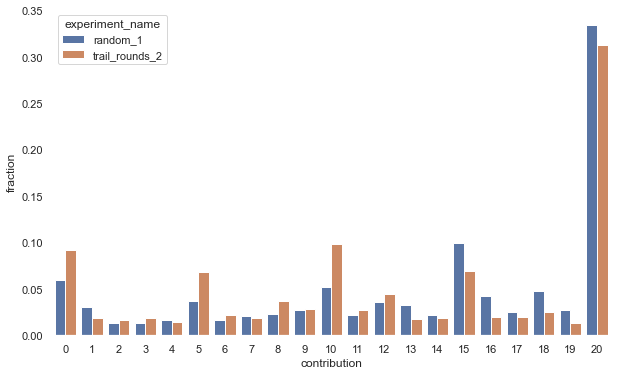

In [19]:
plt.figure(figsize=(10,6))
dfg = df.groupby(['experiment_name'])['contribution'].value_counts(normalize=True)
dfg.name = 'fraction'
dfg = dfg.reset_index()

sns.barplot(data=dfg, x='contribution', y='fraction', hue='experiment_name')
plt.savefig(os.path.join(plot_folder, 'distribution_contribution.jpg'), dpi=300, transparent=False)

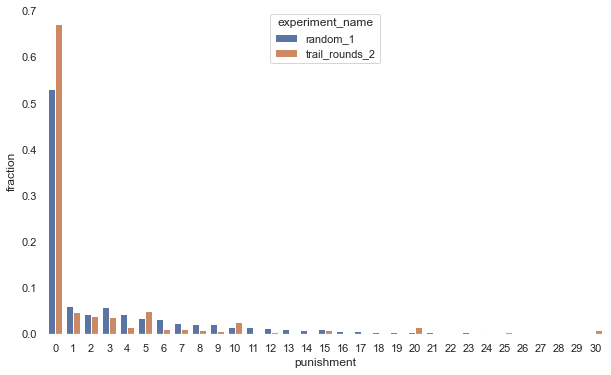

In [20]:
plt.figure(figsize=(10,6))
dfg = df.groupby(['experiment_name'])['punishment'].value_counts(normalize=True)
dfg.name = 'fraction'
dfg = dfg.reset_index()

sns.barplot(data=dfg, x='punishment', y='fraction', hue='experiment_name')
plt.savefig(os.path.join(plot_folder, 'distribution_punishments.jpg'), dpi=300, transparent=False)

## Results

* ~32 of all contributions are 20
* ~66 of all punishments are 0
* participants are heavily biased to contribute or punish a multiple of 5
* very few participants use punishments higher then 20

In [33]:
# plt.figure(figsize=(10,6))
dfg = df.groupby(['experiment_name'])['common_good'].max()
dfg.name = 'fraction'
dfg = dfg.reset_index()
dfg
# sns.barplot(data=dfg, x='common_good', y='fraction', hue='experiment_name')
# plt.savefig(os.path.join(plot_folder, 'distribution_common_good.jpg'), dpi=300, transparent=False)

,experiment_name,fraction
0,random_1,128.0
1,trail_rounds_2,128.0


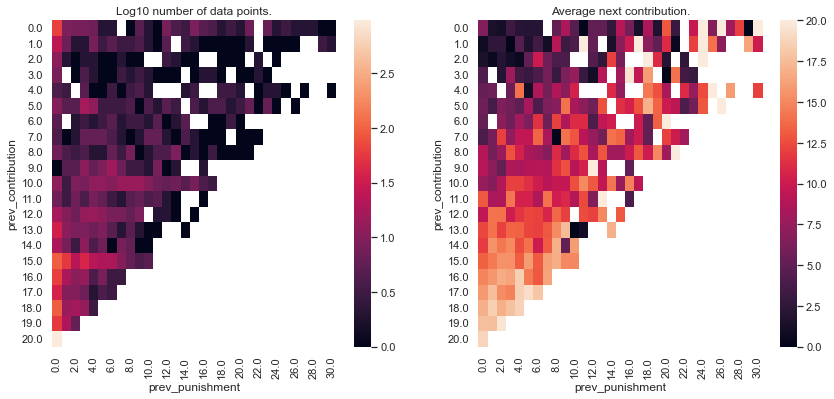

In [21]:
from aimanager.artificial_humans.cross_validation import split_xy
import numpy as np

w = (
    df['experiment_name'] == 'random_1'
)

df_x, sr_y = split_xy(df[w], filter_nan=True)

df_xy = df_x
df_xy['contribution'] = sr_y

df_xy = df_xy.reset_index()


cm1 = df_xy.pivot_table(index=['prev_contribution'], columns='prev_punishment', values='contribution', aggfunc=np.mean)
cm2 = df_xy.pivot_table(index=['prev_contribution'], columns='prev_punishment', values='contribution', aggfunc=len)
cm2 = np.log10(cm2)

# plt.figure(figsize=(14,10))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))


ax1.set_title('Log10 number of data points.')
sns.heatmap(cm2, ax=ax1)
ax2.set_title('Average next contribution.')
sns.heatmap(cm1, ax=ax2)
plt.savefig(os.path.join(plot_folder, 'prev_cont_pun.jpg'), dpi=300, transparent=False)

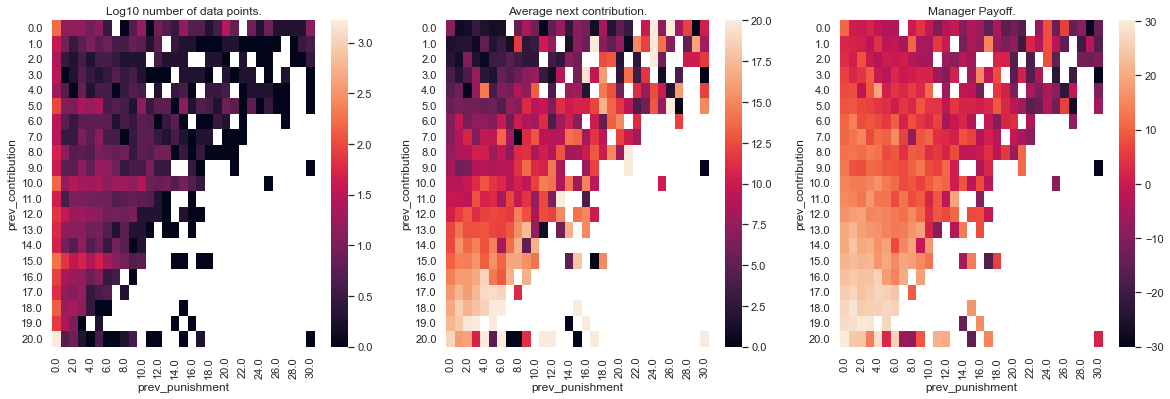

In [22]:
from aimanager.artificial_humans.cross_validation import split_xy
import numpy as np

df_x, sr_y = split_xy(df, filter_nan=True)

df_xy = df_x
df_xy['contribution'] = sr_y

df_xy = df_xy.reset_index()

# plt.figure(figsize=(14,10))
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))


df_xy['manager_payoff'] = df_xy['contribution'] * 1.6 - df_xy['prev_punishment']

df_xy

cm1 = df_xy.pivot_table(index=['prev_contribution'], columns='prev_punishment', values='contribution', aggfunc=np.mean)

cm3 = df_xy.pivot_table(index=['prev_contribution'], columns='prev_punishment', values='manager_payoff', aggfunc=np.mean)


cm2 = df_xy.pivot_table(index=['prev_contribution'], columns='prev_punishment', values='contribution', aggfunc=len)
cm2 = np.log10(cm2)

ax1.set_title('Log10 number of data points.')
sns.heatmap(cm2, ax=ax1)
ax2.set_title('Average next contribution.')
sns.heatmap(cm1, ax=ax2)
ax3.set_title('Manager Payoff.')
sns.heatmap(cm3, ax=ax3)
plt.savefig(os.path.join(plot_folder, 'prev_cont_pun.jpg'), dpi=300, transparent=False)

<AxesSubplot:xlabel='defect', ylabel='punishment'>

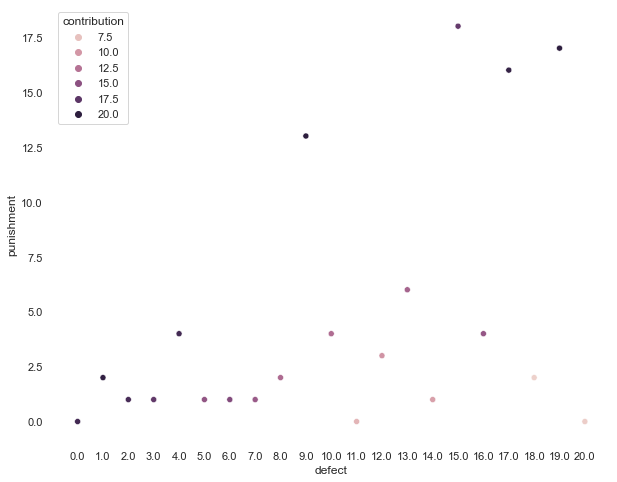

In [23]:
dfg = df_xy.groupby(['prev_contribution', 'prev_punishment'])[['contribution', 'manager_payoff']].mean().reset_index()

dfg[['best_contribution', 'best_manager_payoff']] = dfg[['contribution', 'manager_payoff']] == dfg.groupby(['prev_contribution'])[['contribution', 'manager_payoff']].transform('max')

dfg = dfg[dfg['best_manager_payoff']]
dfg['defect'] = (20-dfg['prev_contribution'])
dfg['punishment'] = dfg['prev_punishment']
dfg = dfg.sort_values('defect')
dfg['defect'] = dfg['defect'].astype(str)

plt.figure(figsize=(10,8))
sns.scatterplot(data=dfg, x='defect', y='punishment', hue='contribution')

## Conclusions

For future sampling
* considering to reduce the number of contribution and punishment levels
* consider sampling with a algorithmic manager to collect additional data with higher punishment rates